<a href="https://colab.research.google.com/github/uthours/Data-Processing-Visualization/blob/main/initialviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uttam Subedi
#Data Processing Visualization
#Dr. Jacob, ECU

>**Abstract** This part shows the number of covid-19 vaccination given for the top 10 countries. The data is published by informationisbeautiful, it was updated on 04/22/2022.

Here is the link for the visualization I am going to recreate for this project. https://informationisbeautiful.net/visualizations/covid-19-coronavirus-infographic-datapack/#treatments

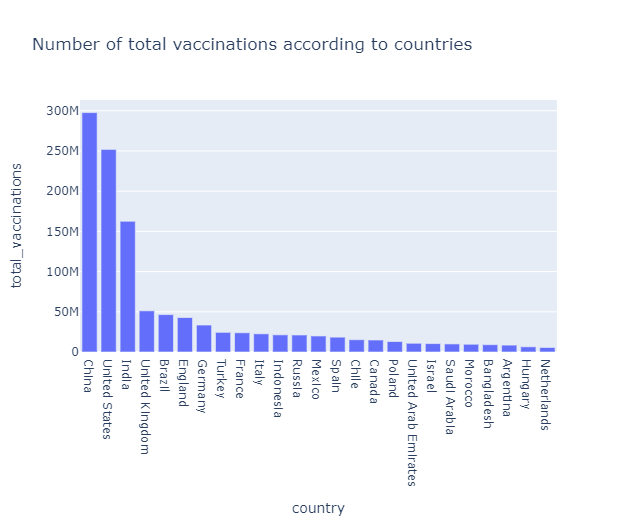

The above graph shows information of the numbers of vaccinations according to countries. China is on the highest position with almost 300 Million vaccination. This is a simple bar garph which shows the name of the country on X-axis and number of vaccination on Y-axis.

The required libraries:

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from wordcloud import WordCloud,ImageColorGenerator
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from pywaffle import Waffle
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: ignored

I downloaded the data from Kaggle here is the [Link](https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/uthours/Data-Processing-Visualization/main/country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
new_df = df.groupby(["country",'iso_code','vaccines'])['total_vaccinations',
                     'people_vaccinated','people_fully_vaccinated',
                    'daily_vaccinations','total_vaccinations_per_hundred',
                    'people_vaccinated_per_hundred',"people_fully_vaccinated_per_hundred"
,'daily_vaccinations_per_million'].max().reset_index()

# Name of Top 10 vaccine

In [ ]:
top10 = new_df['vaccines'].value_counts().nlargest(10)
top10

Oxford/AstraZeneca                                                         20
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech              17
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                               15
Oxford/AstraZeneca, Pfizer/BioNTech                                        11
Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech      8
Johnson&Johnson, Oxford/AstraZeneca, Sinopharm/Beijing                      7
Pfizer/BioNTech                                                             7
Moderna, Pfizer/BioNTech                                                    6
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing     5
Oxford/AstraZeneca, Sinopharm/Beijing                                       5
Name: vaccines, dtype: int64

In [ ]:
data = dict(new_df['vaccines'].value_counts(normalize = True).nlargest(10)*100)                                  #dict(new_df['vaccines'].value_counts(normalize = True) * 100)
vaccine = ['Oxford/AstraZeneca', 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Sinopharm/Beijing', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac'] 
fig = plt.figure( 
    rows=7,
    columns=12,
    FigureClass = Waffle, 
    values = data, 
    title={'label': 'Proportion of Vaccines', 'loc': 'center',
          'fontsize':15},
    colors=("#FF7F0E", "#00B5F7", "#AB63FA","#00CC96","#E9967A","#F08080","#40E0D0","#DFFF00","#DE3163","#6AFF00"),
    labels=[f"{k} ({v:.2f}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 2, 'framealpha': 0},
    figsize=(12, 9)
)
fig.show()

NameError: ignored

# Number of total vaccine in different countries

In [ ]:
data = new_df[['country','total_vaccinations']].nlargest(25,'total_vaccinations')
fig = px.bar(data, x = 'country',y = 'total_vaccinations',title="Number of total vaccinations according to countries",)
fig.show()

In [ ]:
vacc = new_df["vaccines"].unique()
for i in vacc:
    c = list(new_df[new_df["vaccines"] == i]['country'])
    print(f"Vaccine: {i}nUsed countries: {c}")

Vaccine: Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/BeijingnUsed countries: ['Afghanistan', 'Belize', 'Cameroon', 'Namibia', 'Trinidad and Tobago']
Vaccine: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik VnUsed countries: ['Albania', 'Azerbaijan', 'Bosnia and Herzegovina', 'Oman']
Vaccine: Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik VnUsed countries: ['Algeria', 'Zimbabwe']
Vaccine: Moderna, Oxford/AstraZeneca, Pfizer/BioNTechnUsed countries: ['Andorra', 'Australia', 'England', 'Fiji', 'Finland', 'Guernsey', 'Isle of Man', 'Japan', 'Jersey', 'Northern Ireland', 'Scotland', 'Sint Maarten (Dutch part)', 'Sweden', 'United Kingdom', 'Wales']
Vaccine: Oxford/AstraZenecanUsed countries: ['Angola', 'Democratic Republic of Congo', 'Falkland Islands', 'Kiribati', 'Liberia', 'Mali', 'Montserrat', 'Nauru', 'Nigeria', 'Papua New Guinea', 'Pitcairn', 'Saint Helena', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Solomon Islands', 'Togo

In [ ]:
fig = px.choropleth(new_df,locations = 'country',locationmode = 'country names',color = 'vaccines',
                   title = 'Vaccines used by specefic Country',hover_data= ['total_vaccinations'])
fig.show()

In [ ]:
vaccine = new_df["vaccines"].value_counts().reset_index()
vaccine.columns = ['Vaccines','Number of Country']
vaccine.nlargest(5,"Number of Country")

,Vaccines,Number of Country
0,Oxford/AstraZeneca,20
1,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",17
2,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",15
3,"Oxford/AstraZeneca, Pfizer/BioNTech",11
4,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",8


In [ ]:
fig = px.treemap(new_df,names = 'country',values = 'total_vaccinations',
                 path = ['vaccines','country'],
                 title="Total Vaccinations per country grouped by Vaccines",
                 color_discrete_sequence =px.colors.qualitative.Set1)
fig.show()

https://www.analyticsvidhya.com/blog/2021/05/covid-19-vaccination-data-analysis-visualization/#related-articles


#Refrences:
1. https://github.com/nurfnick/Data_Viz

2. https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress?resource
